# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know the following things about the prospective properties:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

## Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## 1. Importing Neccessary libraries

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## 2. Data Reading and Data Understanding

In [2]:
housing_df = pd.read_csv(r"C:\Users\SHIV-G\Downloads\Advanced machine learning\Assignment\train.csv")

In [3]:
# copying of dataset to prevent the data loss
df = housing_df.copy()

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# shape of dataframe
df.shape

(1460, 81)

In [6]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# deteching columns by data type 
int_cols = df.select_dtypes(include="int64").shape[1]
flo_cols = df.select_dtypes(include="float64").shape[1]
obj_cols = df.select_dtypes(include="object").shape[1]

print("Total no of integer columns : ", int_cols)
print("Total no of float columns : ", flo_cols)
print("Total no of object columns : ", obj_cols)

Total no of integer columns :  35
Total no of float columns :  3
Total no of object columns :  43


In [8]:
# statistical information of the datasets
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

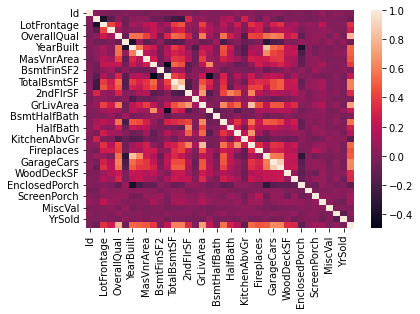

In [9]:
# correlation matrix
sns.heatmap(df.corr())

`insight`

- The dataset contains **rows = 1461**  and **81 columns**. 
- The data description shows the **outliers** in some columns.
- 81 columns have **35 integer columns, 3 float columns, 43 object columns**.
- Information of dataset show the **missing values** in columns

There are 35 numerical features, of the following types:

- Square footage: Indicates the square footage of certain features, i.e. 1stFlrSF (First floor square footage) and GarageArea (Size of garage in square feet).
- Time: Time related variables like when the home was built or sold.
- Room and amenties: data that represent amenties like “How many bathrooms?”
- Condition and quality: Subjective variables rated from 1–10.

## 3. EDA

- We don't need id columns. Hence We will drop it

In [10]:
df.drop("Id", axis=1, inplace=True)

In [11]:
df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


#### 3.1 Detecting outliers using boxplot

In [12]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


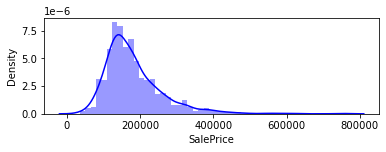

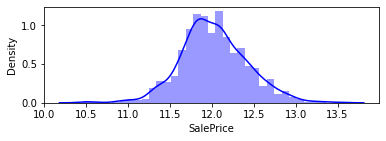

In [13]:
# checking skewness of the saleprice before

plt.figure(figsize=(6,6))
plt.subplot(3,1,1)
sns.distplot(df.SalePrice,kde=True,color="blue")
plt.show()

######################### Treating skewness in predictor variable ########################################

# checking skewness of the saleprice after log transformation
plt.figure(figsize=(6,6))
plt.subplot(3,1,2)
df["SalePrice"] = np.log(df.SalePrice)
x = df.SalePrice
sns.distplot(x, kde=True,color="blue")
plt.show()

# # upgrading log transformation using sqrt transformation
# plt.figure(figsize=(6,6))
# plt.subplot(3,1,3)
# df["SalePrice_sqrt_transform"] = np.sqrt(x)
# x1 = df.SalePrice_sqrt_transform
# sns.distplot(x1,kde=True, color="blue")
# plt.show()

##### Treating outliers

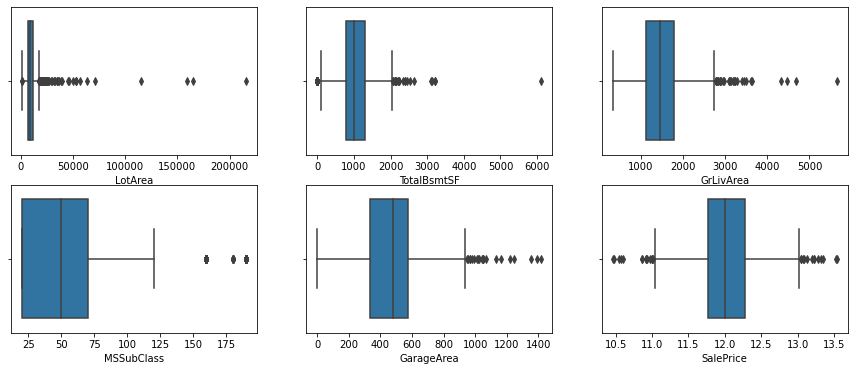

In [14]:
# box plot of numerical columns
plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
sns.boxplot(df.LotArea)


plt.subplot(2,3,2)
sns.boxplot(df.TotalBsmtSF)

plt.subplot(2,3,3)
sns.boxplot(df.GrLivArea)

plt.subplot(2,3,4)
sns.boxplot(df.MSSubClass)

plt.subplot(2,3,5)
sns.boxplot(df.GarageArea)

plt.subplot(2,3,6)
sns.boxplot(df.SalePrice)

plt.show()

In [15]:
def outlier_treatment(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    
    IQR = Q3 - Q1
    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR 
    
    df.loc[(df[col] > upper_cap), col ] = upper_cap
    df.loc[(df[col] < lower_cap), col ] = lower_cap
    
    return df

In [16]:
outlier_treatment(df, "LotArea").head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011


In [17]:
outlier_treatment(df, "GrLivArea").head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710.0,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262.0,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011


In [18]:
outlier_treatment(df, "MSSubClass").head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710.0,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262.0,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011


In [19]:
outlier_treatment(df, "TotalBsmtSF").head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710.0,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262.0,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011


In [20]:
outlier_treatment(df, "GarageArea").head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710.0,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262.0,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011


In [21]:
outlier_cols = ["LotArea","GrLivArea","MSSubClass","TotalBsmtSF","GarageArea"]

In [22]:
# box plot of numerical columns
def boxplot(col):
    print("___________"*3)
    print(f'Boxplot for {col.upper()}')
    plt.boxplot(df[col])
    plt.show()
    

_________________________________
Boxplot for LOTAREA


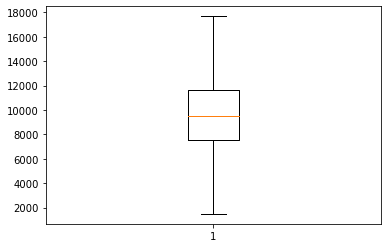

_________________________________
Boxplot for GRLIVAREA


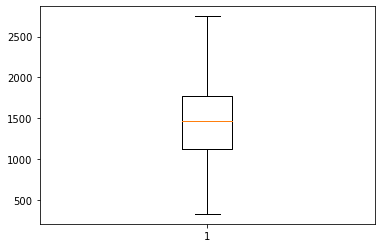

_________________________________
Boxplot for MSSUBCLASS


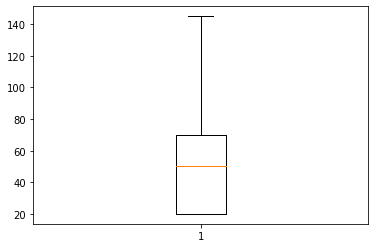

_________________________________
Boxplot for TOTALBSMTSF


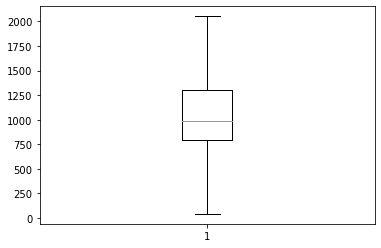

_________________________________
Boxplot for GARAGEAREA


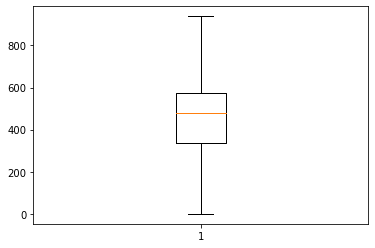

In [23]:
for  i in outlier_cols:
    boxplot(i)

`insight`
- Outliers  are handled in these columns.

In [24]:
def bar_plot(col):
    sns.barplot(df[col],df.SalePrice)
    plt.show()

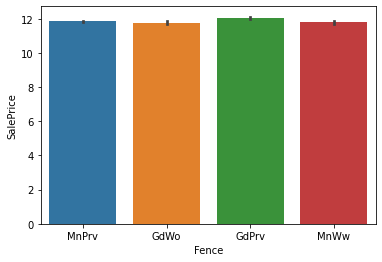

In [25]:
bar_plot("Fence")

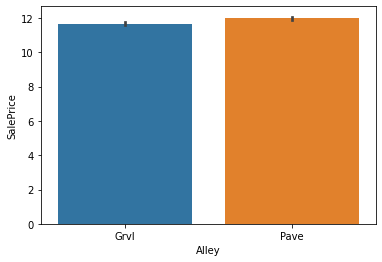

In [26]:
bar_plot("Alley")

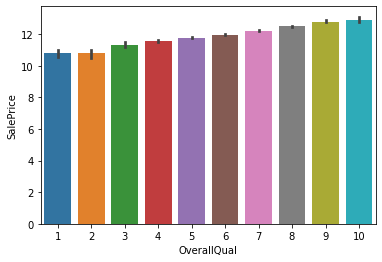

In [27]:
bar_plot('OverallQual')

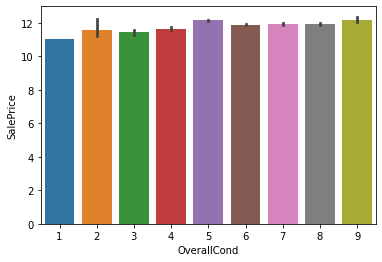

In [28]:
bar_plot('OverallCond')

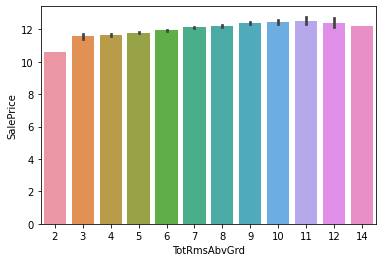

In [29]:
bar_plot('TotRmsAbvGrd')

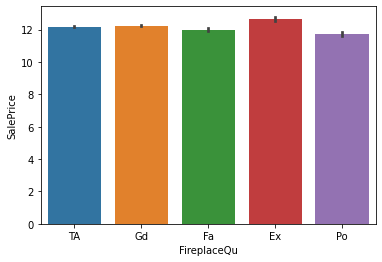

In [30]:
bar_plot('FireplaceQu')

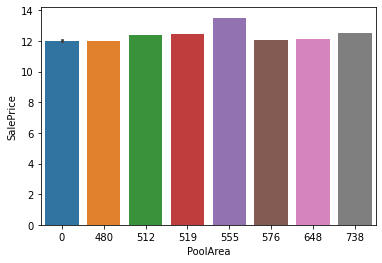

In [31]:
bar_plot('PoolArea')

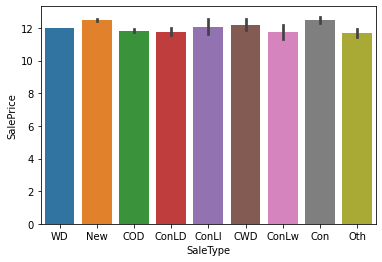

In [32]:
bar_plot('SaleType')

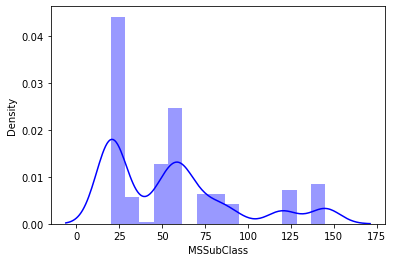

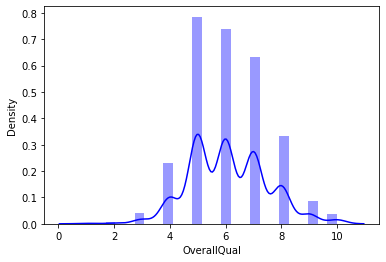

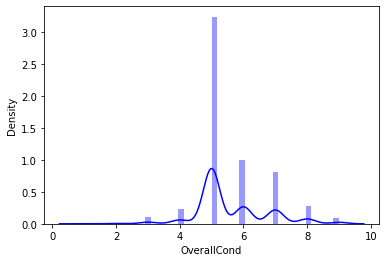

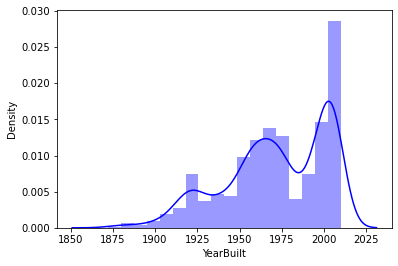

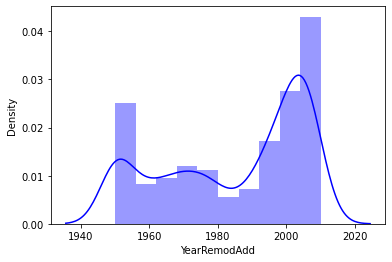

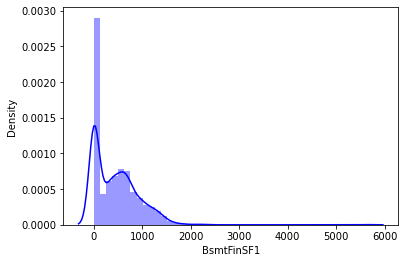

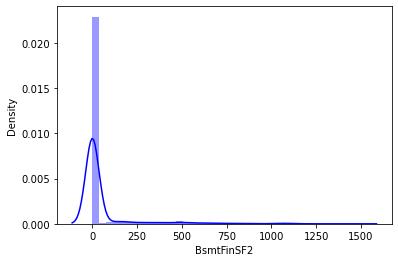

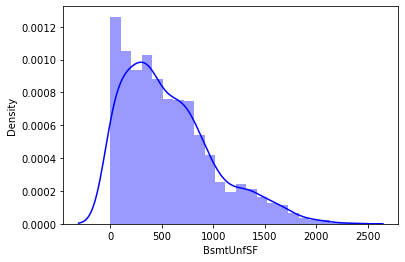

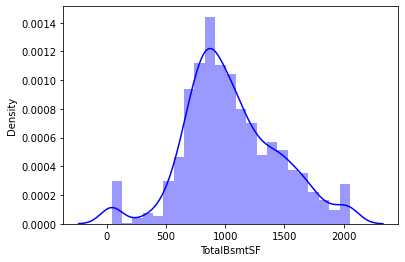

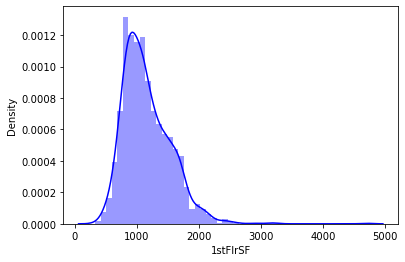

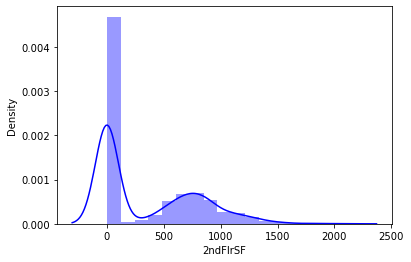

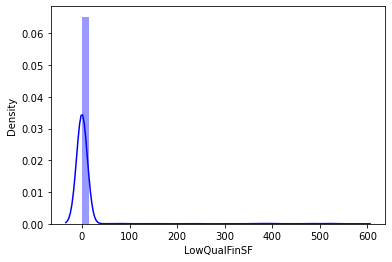

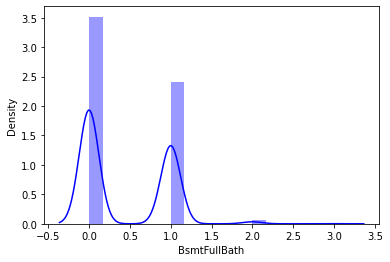

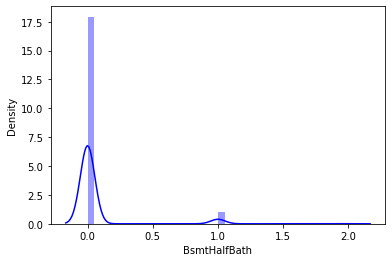

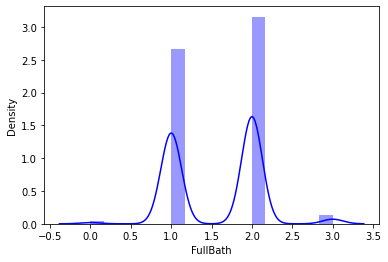

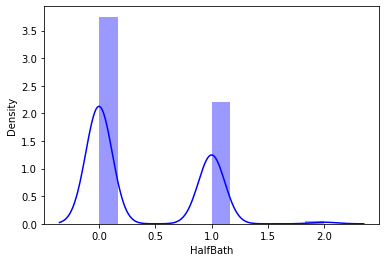

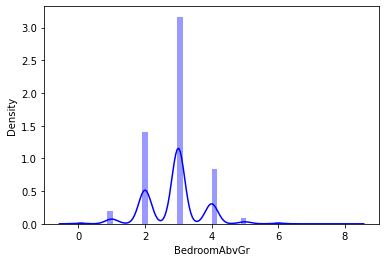

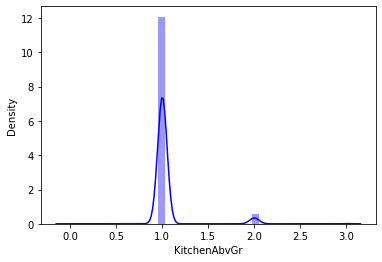

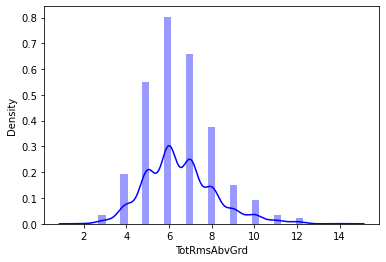

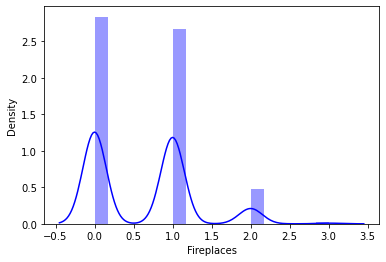

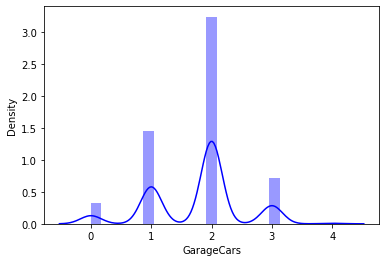

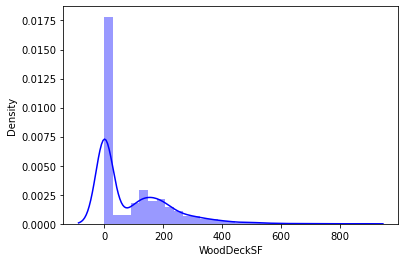

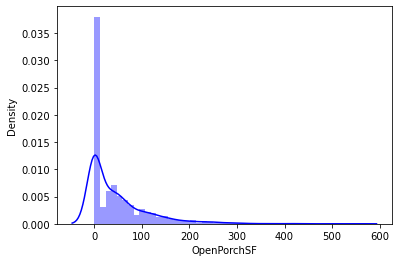

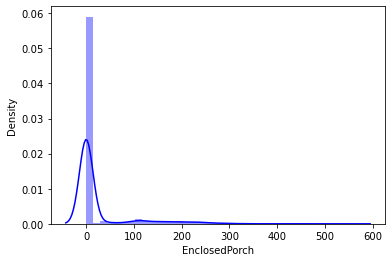

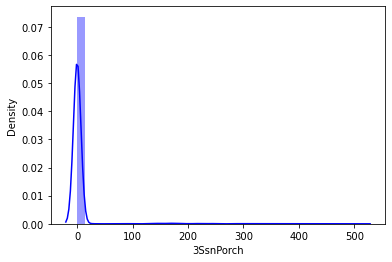

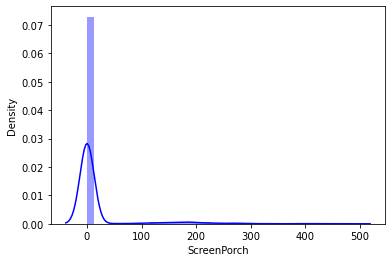

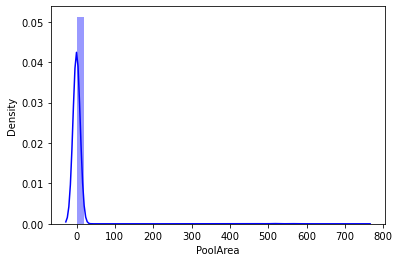

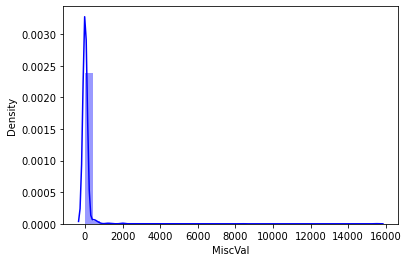

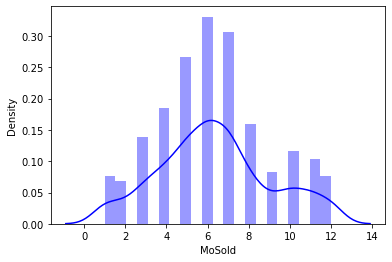

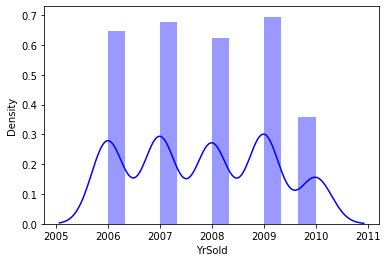

In [33]:
# QUANTITATIVE VARIABLE
for col in df.select_dtypes('int'):
    #print(col)
    plt.figure()
    sns.distplot(df[col],color="blue")

`insight`

- From the Histogram plot we can see the variance of the data in each columns.

In [34]:
# HIGH CORR FEATURE
high_corr = df.corr()
high_corr_feat = high_corr.index[abs(high_corr.SalePrice) >= 0.5]
high_corr_feat

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')

<AxesSubplot:>

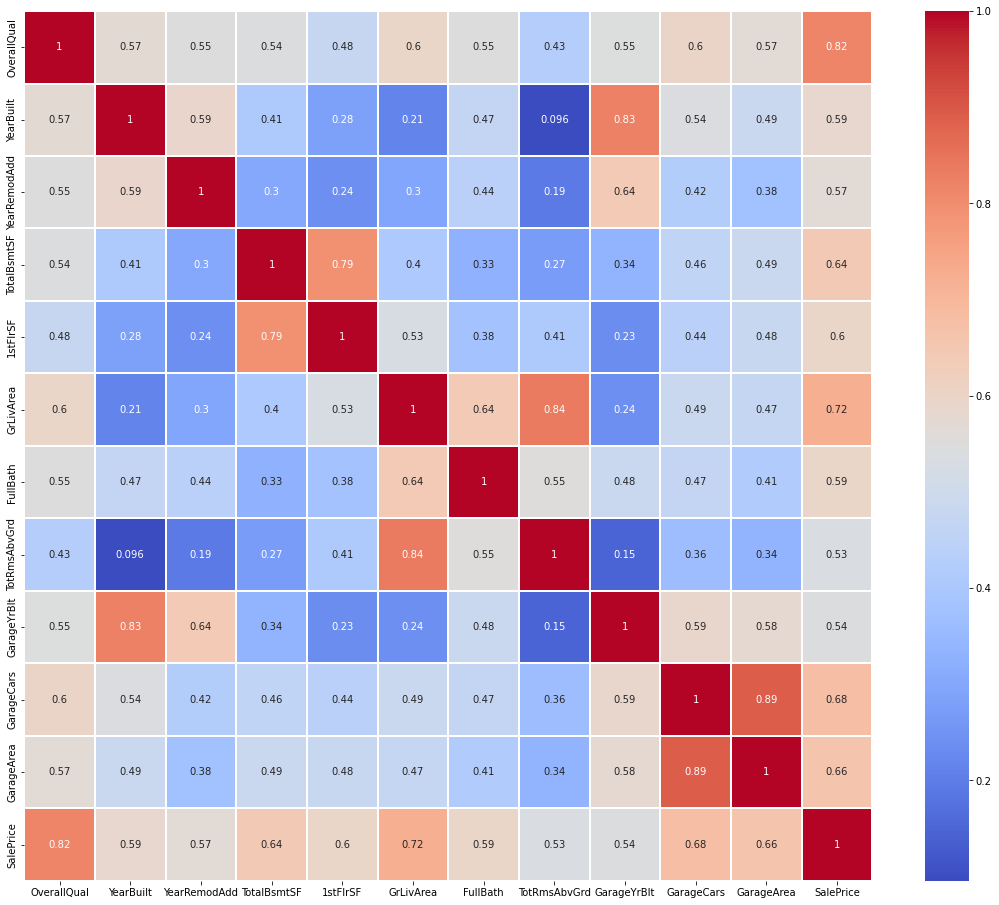

In [35]:
# ploting the heatmap
plt.figure(figsize=(19,16))
sns.heatmap(df[high_corr_feat].corr(),cmap="coolwarm", annot=True,linewidth=2)

`insight`

- Features related to space such as **garage area**, **ground living area**,**YearBlt**, **overallQaul** are all positively correlated with **sale price** as one might expect. **The logic being that larger properties should be more expensive**. No correlations look suspicious here.

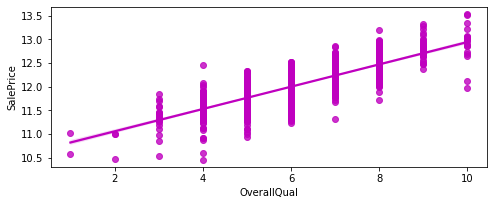

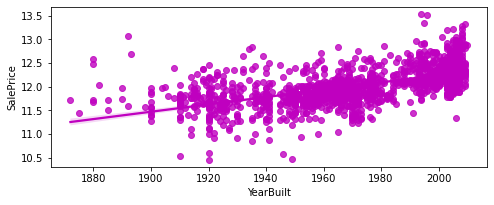

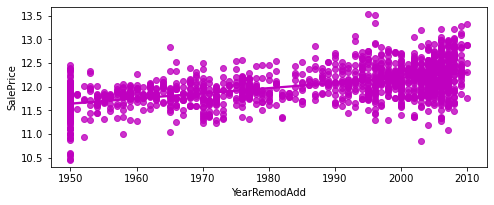

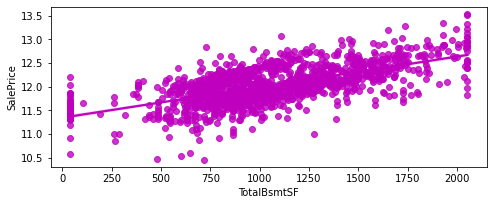

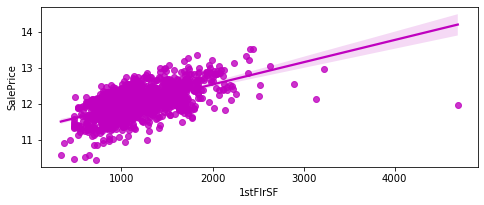

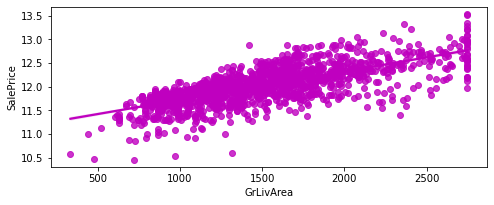

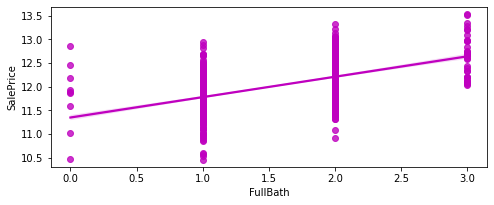

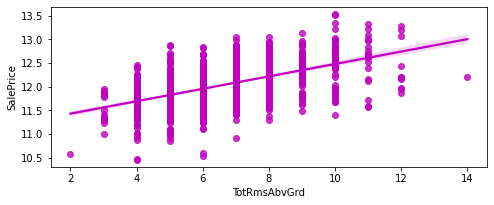

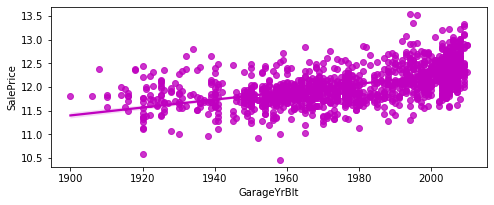

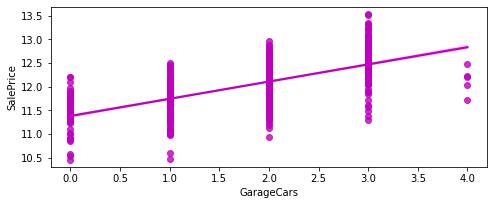

In [36]:
# linearity checking of high correlation data 

for i in range(len(high_corr_feat)):
    if i <= 9:
        plt.figure(figsize=(36,10))
        plt.subplot(3,4,(i)+1)
        sns.regplot(data=df, x=high_corr_feat[i], y="SalePrice", color="m")
        plt.show()
        

`insight`

- Most of the columns is showing the linear relationship. Hence we use the choose the **Linear Model**  for the best cases.

## 4. Data Cleaning and Manipulation

### 4.1 Handling Missing values

#### 4.1.1 Checking Missing value

In [37]:
# checking and dropping duplicate recoreds if any

df= df.drop_duplicates()

In [38]:
# checking missing values
df.isnull().sum().sum()

6965

In [39]:
# checking missing values by each columns
df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [40]:
# checking missing values percentage by each columns
null_percentage = (df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)
null_percentage

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtCond          2.534247
BsmtQual          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
MSSubClass        0.000000
Fireplaces        0.000000
Functional        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

**4.1.2 Categorising the missing value columns by percentage of missing values**

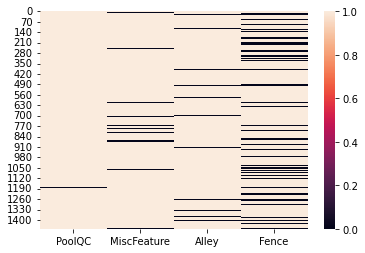

<Figure size 432x288 with 0 Axes>

In [41]:
# missing value  greater than 60
missing_value_60 = null_percentage[null_percentage > 60]

#visualizing the missing value
sns.heatmap(df[missing_value_60.keys()].isnull())
plt.show()
plt.savefig("missing_value_60.png")

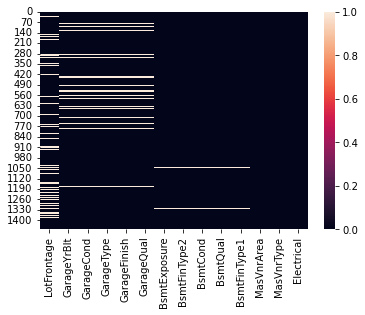

<Figure size 432x288 with 0 Axes>

In [42]:
# missing value  0 to 20
missing_value_0_20 = null_percentage[(null_percentage < 20) & (null_percentage > 0) ]

#visualizing the missing value
sns.heatmap(df[missing_value_0_20.keys()].isnull())
plt.show()
plt.savefig("missing_value_0_20.png")

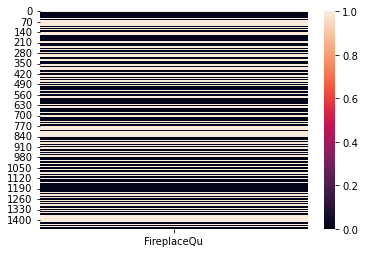

<Figure size 432x288 with 0 Axes>

In [43]:
# missing value  20 to 60
missing_value_20_60 = null_percentage[(null_percentage > 20) & (null_percentage < 60) ]


#visualizing the missing value
sns.heatmap(df[missing_value_20_60.keys()].isnull())
plt.show()
plt.savefig("missing_value_20_60.png")

**4.1.3 Visualising the missing values of dataframe**

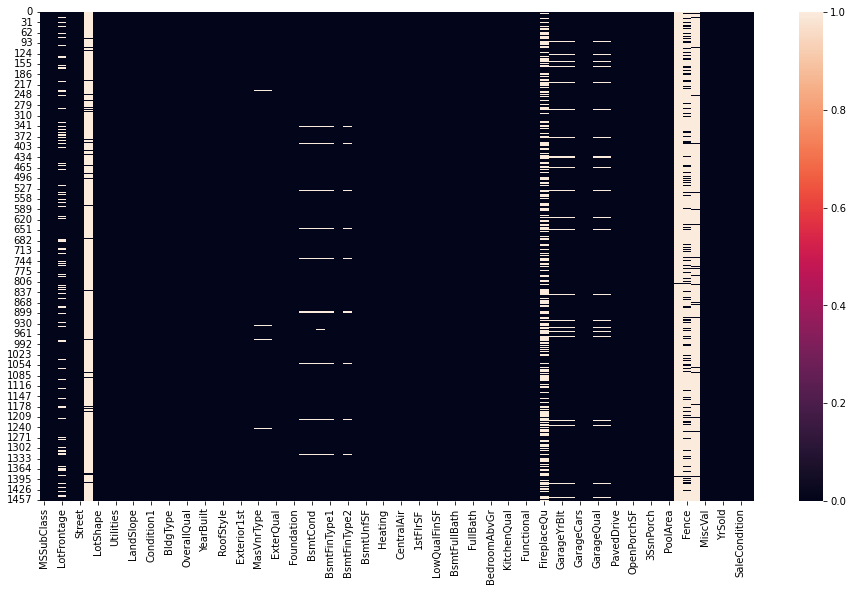

In [44]:
# visualising the missing values
plt.figure(figsize=(16,9))
sns.heatmap(df.isna())
plt.savefig("Heatmap image of Null value.png")

### 4.2 Imputing / Droping every columns missing value one by one

#### 4.2.1 Handling PoolQC column

In [45]:
# value counts 
df.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

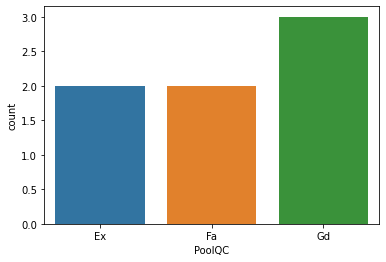

In [46]:
# plot the column
sns.countplot(df.PoolQC)
plt.show()

##### Column data type is Object.

In [47]:
# data type of column
print("Data Type : ", df.PoolQC.dtype)

poolqc_mode = df.PoolQC.mode()[0]

# imputing missing value using mode 
df["PoolQC"].replace(np.nan, poolqc_mode, inplace=True)

# checking missing value again
print("Missing value after Imputation : ", df.PoolQC.isna().sum())

Data Type :  object
Missing value after Imputation :  0


#### 4.2.2 Handling  MiscFeature

In [48]:
# data type of column
print("Data Type : ", df.MiscFeature.dtype)

miscFeature_mode = df.MiscFeature.mode()[0]

# imputing missing value using mode 
df["MiscFeature"].replace(np.nan, miscFeature_mode, inplace=True)

# checking missing value again
print("Missing value after Imputation : ", df.MiscFeature.isna().sum())

Data Type :  object
Missing value after Imputation :  0


#### 4.2.4 Handling Alley

In [49]:
# data type of column
print("Data Type : ", df.Alley.dtype)


alley_mode = df.Alley.mode()[0]

# imputing missing value using mode 
df["Alley"].replace(np.nan, alley_mode, inplace=True)

# checking missing value again
print("Missing value after Imputation : ", df.Alley.isna().sum())

Data Type :  object
Missing value after Imputation :  0


#### 4.2.5 Handling Fence

In [50]:
# data type of column
print("Data Type : ", df.Fence.dtype)


fence_mode = df.Fence.mode()[0]

# imputing missing value using mode 
df["Fence"].replace(np.nan, fence_mode, inplace=True)

# checking missing value again
print("Missing value after Imputation : ", df.Fence.isna().sum())

Data Type :  object
Missing value after Imputation :  0


(array([1336.,    0.,    0.,   54.,    0.,    0.,   59.,    0.,    0.,
          11.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

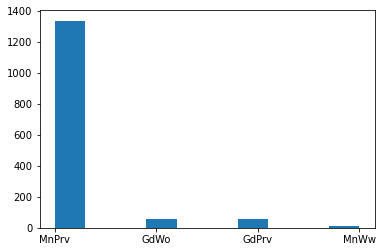

In [51]:
plt.hist(df.Fence)

#### 4.2.6 Handling FireplaceQu

In [52]:
# data type of column
print("Data Type : ", df.FireplaceQu.dtype)

fireplaceQu_mode = df.FireplaceQu.mode()[0]

# imputing missing value using mode 
df["FireplaceQu"].replace(np.nan, fireplaceQu_mode, inplace=True)

# checking missing value again
print("Missing value after Imputation : ", df.FireplaceQu.isna().sum())

Data Type :  object
Missing value after Imputation :  0


#### 4.2.7 Handling LotFrontage

In [53]:
# data type of column
print("Data Type : ", df.LotFrontage.dtype)

lotFrontage_median = df.LotFrontage.median()

# imputing missing value using median 
df["LotFrontage"].replace(np.nan, lotFrontage_median, inplace=True)

# checking missing value again
print("Missing value after Imputation : ", df.LotFrontage.isna().sum())

Data Type :  float64
Missing value after Imputation :  0


#### 4.2.8 Handling ALL Garage Features

In [54]:
garage_feat = ["GarageYrBlt", "GarageCond","GarageType","GarageFinish", "GarageQual"]

In [55]:
df[garage_feat].sample(10)

,GarageYrBlt,GarageCond,GarageType,GarageFinish,GarageQual
944,1958.0,TA,Basment,RFn,TA
524,1996.0,TA,Attchd,Fin,TA
281,2006.0,TA,Attchd,Fin,TA
855,1962.0,TA,Detchd,Unf,TA
202,1924.0,TA,Attchd,Unf,TA
38,1953.0,TA,Detchd,Unf,TA
723,1958.0,TA,Detchd,Unf,TA
1120,1920.0,TA,Detchd,Unf,TA
466,1970.0,TA,Attchd,Unf,TA
383,1950.0,Fa,Detchd,Unf,Fa


In [56]:
    # checking data types and value counts of features
    for i in garage_feat:
        print("-"*20)
        print(f"The {i} has data type is :  {df[i].dtype}")


--------------------
The GarageYrBlt has data type is :  float64
--------------------
The GarageCond has data type is :  object
--------------------
The GarageType has data type is :  object
--------------------
The GarageFinish has data type is :  object
--------------------
The GarageQual has data type is :  object


In [57]:
# value counts for the garage_feat
for i in garage_feat[1::]:
    print("-"*20)
    print(f"Value count for {i} is : {df[i].value_counts()}")

--------------------
Value count for GarageCond is : TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
--------------------
Value count for GarageType is : Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
--------------------
Value count for GarageFinish is : Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
--------------------
Value count for GarageQual is : TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64


In [58]:
# show the columns for understanding the columns values
for i in garage_feat:
    print("************************************")
    print(df[i].head(3))    

************************************
0    2003.0
1    1976.0
2    2001.0
Name: GarageYrBlt, dtype: float64
************************************
0    TA
1    TA
2    TA
Name: GarageCond, dtype: object
************************************
0    Attchd
1    Attchd
2    Attchd
Name: GarageType, dtype: object
************************************
0    RFn
1    RFn
2    RFn
Name: GarageFinish, dtype: object
************************************
0    TA
1    TA
2    TA
Name: GarageQual, dtype: object


In [59]:
# this is the garage feat [0] columns

garage_median = df["GarageYrBlt"].median()

# imputing missing value using median 
df["GarageYrBlt"].replace(np.nan, garage_median, inplace=True)

# checking missing value again
print("Missing value after Imputation : ", df.GarageYrBlt.isna().sum())

Missing value after Imputation :  0


In [60]:
for i in garage_feat[1::]:
    garage_mode = df[i].mode()[0]

    # imputing missing value using mode 
    df[i].replace(np.nan, garage_mode, inplace=True)

    # checking missing value again
    print("Missing value after Imputation : ", df[i].isna().sum())


Missing value after Imputation :  0
Missing value after Imputation :  0
Missing value after Imputation :  0
Missing value after Imputation :  0


#### 4.2.9 Handling All Bsmt Features

In [61]:
bsmt_feat = ["BsmtFinType2","BsmtExposure","BsmtQual","BsmtCond","BsmtFinType1"]

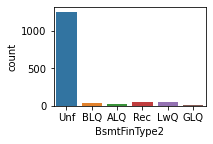

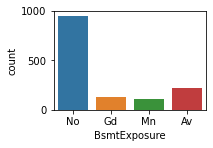

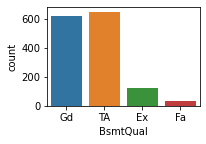

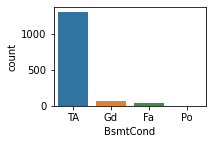

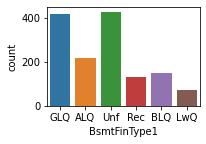

In [62]:
# visualize the bsmt_feat
j= 1
for i in bsmt_feat:
    plt.subplot(2,2,j)
    sns.countplot(df[i])
    plt.show()

In [63]:
df[bsmt_feat].sample(10)

,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1
261,Unf,No,Ex,TA,Unf
683,Unf,Av,Gd,TA,GLQ
408,Unf,No,Ex,Gd,Unf
1275,Unf,No,TA,TA,Rec
362,NaN,NaN,NaN,NaN,NaN
22,Unf,No,Gd,TA,Unf
1323,Unf,No,TA,TA,LwQ
1048,NaN,NaN,NaN,NaN,NaN
833,BLQ,No,TA,TA,Rec
582,Unf,Av,Gd,TA,GLQ


In [64]:
# checking data types and value counts of features
for i in bsmt_feat:
    print("-"*20)
    print(f"The {i} has data type is :  {df[i].dtype}")
    

--------------------
The BsmtFinType2 has data type is :  object
--------------------
The BsmtExposure has data type is :  object
--------------------
The BsmtQual has data type is :  object
--------------------
The BsmtCond has data type is :  object
--------------------
The BsmtFinType1 has data type is :  object


In [65]:
# value counts for the bsmt_feat
for i in bsmt_feat:
    print("-"*20)
    print(f"Value count for {i} is : {df[i].value_counts()}")

--------------------
Value count for BsmtFinType2 is : Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
--------------------
Value count for BsmtExposure is : No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
--------------------
Value count for BsmtQual is : TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
--------------------
Value count for BsmtCond is : TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
--------------------
Value count for BsmtFinType1 is : Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64


In [66]:
for i in bsmt_feat:
    bsmt_mode = df[i].mode()[0]

    # imputing missing value using mode 
    df[i].replace(np.nan, bsmt_mode, inplace=True)

    # checking missing value again
    print("Missing value after Imputation : ", df[i].isna().sum())


Missing value after Imputation :  0
Missing value after Imputation :  0
Missing value after Imputation :  0
Missing value after Imputation :  0
Missing value after Imputation :  0


#### 4.2.10 all MasVnr features

In [67]:
mas_feat = ["MasVnrArea","MasVnrType"]

In [68]:
df[mas_feat].sample(10)

,MasVnrArea,MasVnrType
678,464.0,Stone
1291,268.0,BrkFace
1423,0.0,None
68,0.0,None
570,108.0,BrkFace
1280,110.0,BrkFace
329,0.0,None
929,285.0,BrkFace
1033,295.0,Stone
357,0.0,None


`insight`

- Here **None** in the MasVnrType column that mean **Not Available**

In [69]:
# checking data types and value counts of features
for i in mas_feat:
    print("-"*20)
    print(f"The {i} has data type is :  {df[i].dtype}")
    

--------------------
The MasVnrArea has data type is :  float64
--------------------
The MasVnrType has data type is :  object


In [70]:
# value counts for the bsmt_feat
for i in mas_feat:
    print("-"*20)
    print(f"Value count for {i} is : {df[i].value_counts()}")

--------------------
Value count for MasVnrArea is : 0.0       861
180.0       8
72.0        8
108.0       8
120.0       7
16.0        7
200.0       6
340.0       6
106.0       6
80.0        6
132.0       5
320.0       5
360.0       5
84.0        5
170.0       5
220.0       4
336.0       4
183.0       4
252.0       4
196.0       4
300.0       4
268.0       4
40.0        4
168.0       4
100.0       4
270.0       4
210.0       4
76.0        4
288.0       4
216.0       4
160.0       4
178.0       4
246.0       4
456.0       4
74.0        3
70.0        3
50.0        3
44.0        3
272.0       3
226.0       3
104.0       3
116.0       3
90.0        3
145.0       3
148.0       3
42.0        3
110.0       3
128.0       3
85.0        3
136.0       3
420.0       3
186.0       3
256.0       3
166.0       3
350.0       3
130.0       3
99.0        3
176.0       3
174.0       3
208.0       3
312.0       3
169.0       3
240.0       3
82.0        3
289.0       2
232.0       2
95.0        2
18.0     

In [71]:
# for the object values

mas_mode = "NA"      #df.MasVnrType.mode()[0]  it is giving None which mean NOT AVAILABLE  in the of thing

# imputing missing value using mode 
df.MasVnrType.replace(np.nan, mas_mode, inplace=True)

# checking missing value again
print("Missing value after Imputation : ", df.MasVnrType.isna().sum())


Missing value after Imputation :  0


In [72]:
# for the object values

mas_median = df.MasVnrArea.median()

# imputing missing value using median 
df.MasVnrArea.replace(np.nan, mas_median, inplace=True)

# checking missing value again
print("Missing value after Imputation : ", df.MasVnrArea.isna().sum())


Missing value after Imputation :  0


#### 4.2.11 Handling Electrical features    

In [73]:
# data type of column
print("Data Type : ", df.Electrical.dtype)


electrical_mode = df.Electrical.mode()[0]

# imputing missing value using mode 
df.Electrical.replace(np.nan, electrical_mode, inplace=True)

# checking missing value again
print("Missing value after Imputation : ", df.Electrical.isna().sum())

Data Type :  object
Missing value after Imputation :  0


**After the Handled the missing values**


In [74]:
# checking missing value in columns
df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [75]:
# checking missing value percentage in each columns
df.isna().sum()*100/ len(df)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

<AxesSubplot:>

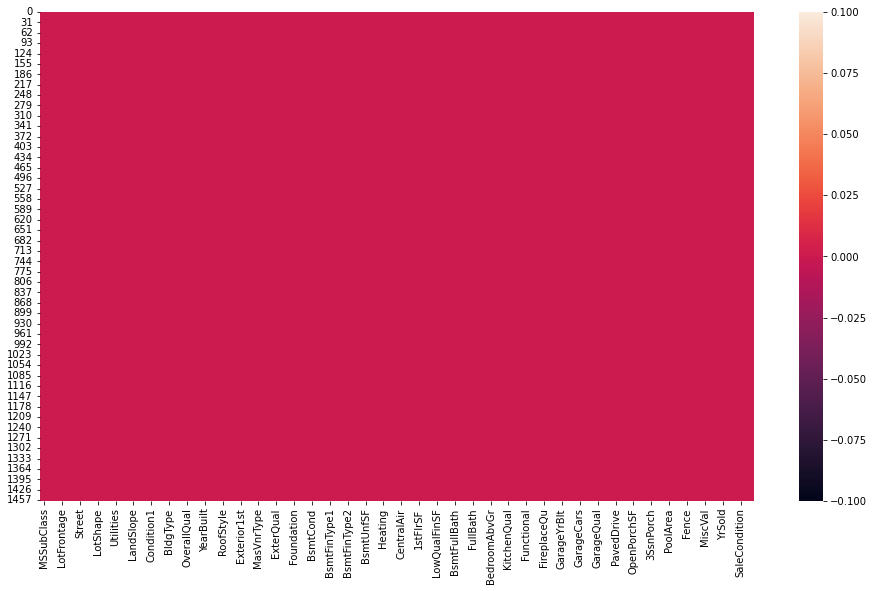

In [76]:
# visualising the missing values 
plt.rcParams["figure.figsize"] = (16,9)
sns.heatmap(df.isna())

`insight`

- All missing values are handled.
- Here the data loss is very minimized.

In [77]:
df.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
549,60,FV,75.0,9375.0,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,912,912,GasA,Ex,Y,SBrkr,912,1182,0,2094.000,0,0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2003.0,Fin,2,615.0,TA,TA,Y,182,182,0,0,0,0,Gd,MnPrv,Shed,0,11,2009,WD,Normal,12.479909
1420,60,RL,90.0,11700.0,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,6,1968,1968,Gable,CompShg,HdBoard,HdBoard,BrkFace,420.0,TA,TA,CBlock,TA,TA,No,ALQ,404,Unf,0,304,708,GasA,Gd,Y,SBrkr,708,708,0,1416.000,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1968.0,RFn,2,776.0,TA,TA,Y,0,169,0,0,119,0,Gd,MnPrv,Shed,0,5,2006,WD,Normal,12.100156
691,60,RL,104.0,17673.5,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2052,GasA,Ex,Y,SBrkr,2444,1872,0,2747.625,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832.0,TA,TA,Y,382,50,0,0,0,0,Gd,MnPrv,Shed,0,1,2007,WD,Normal,13.534473
1290,80,RL,69.0,14112.0,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,SLvl,5,7,1964,1964,Hip,CompShg,Wd Sdng,HdBoard,BrkFace,86.0,TA,TA,PConc,TA,TA,Av,GLQ,1014,Unf,0,138,1152,GasA,TA,Y,SBrkr,1152,0,0,1152.000,1,0,1,0,3,1,TA,6,Typ,1,Gd,Attchd,1964.0,RFn,2,484.0,TA,TA,Y,227,0,0,0,0,0,Gd,MnPrv,Shed,0,4,2010,WD,Normal,12.103486
1300,60,RL,69.0,10762.0,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,None,344.0,Gd,TA,PConc,Gd,TA,No,GLQ,694,Unf,0,284,978,GasA,Ex,Y,SBrkr,1005,978,0,1983.000,0,0,2,1,3,1,Gd,9,Typ,1,TA,Attchd,1999.0,Fin,2,490.0,TA,TA,Y,0,0,0,0,0,0,Gd,MnPrv,Shed,0,5,2009,WD,Normal,12.323856


## 5. Data Preprocessing

#### 5.1 Converting Categorical variable to Numerical Variables

In [78]:
df = pd.get_dummies(df,drop_first=True) #Getting dummies for categorical values
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710.0,1,0,2,1,3,1,8,0,2003.0,2,548.0,0,61,0,0,0,0,0,2,2008,12.247694,

In [79]:
# remove duplicated columns after getdummies
df = df.loc[:, ~df.columns.duplicated()]

`insight`

- No duplicated columns present (shape of columns before and after of getdummies)

In [80]:
df.sample(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
570,90,74.0,13101.0,5,5,1965,1965,108.0,231,0,1497,1728,1728,0,0,1728.0,0,0,2,0,6,2,10,0,1987.0,2,576.0,0,0,0,0,0,0,0,11,2008,11.86

In [81]:
df.shape

(1460, 247)

#### 5.2 Splitting Data set into training and testing set

In [82]:
#y to contain target variable, dependent variable
y = df.SalePrice

In [83]:
# all remaining varible also our independent varibles
X = df.drop("SalePrice",1)

In [84]:
from sklearn.model_selection import train_test_split
#Splitting test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [85]:
X_test.shape, y_test.shape

((365, 246), (365,))

In [86]:
X_train.shape, y_train.shape

((1095, 246), (1095,))

In [87]:
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
30      10.596635
31      11.914048
32      12.100156
33      12.016726
34      12.533576
35      12.641097
36      11.884489
37      11.938193
38      11.599103
39      11.314475
40      11.982929
41      12.043554
42      11.877569
43      11.777211
44      11.856515
45      12.675764
46      12.387085
47      12.428015
48      11.635143
49      11.751942
50      12.083905
51      11.648330
52      11.608236
53      12.860999
54      11.775290
55      12

In [88]:
X_train.head(4)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1023,120,43.0,3182.0,7,5,2005,2006,14.0,16,0,1330,1346,1504,0,0,1504.0,0,0,2,0,2,1,7,1,2005.0,2,437.0,156,20,0,0,0,0,0,5,2008,0,0,1,0,1,0,0,0

In [89]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.00000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095

#### 5.3 Feature Scaling

In [90]:
df["MSSubClass"] = df.MSSubClass.astype(int)

In [91]:
from sklearn.preprocessing import StandardScaler
# scaling the features

sc = StandardScaler()

sc.fit_transform(X_train)

array([[ 1.72687039, -1.19066436, -1.81346361, ..., -0.12557844,
         0.45381399, -0.2992528 ],
       [-0.93790283,  0.34484313,  0.1138817 , ..., -0.12557844,
         0.45381399, -0.2992528 ],
       [-0.13847086, -0.44484643, -0.18527509, ..., -0.12557844,
         0.45381399, -0.2992528 ],
       ...,
       [-0.93790283, -0.44484643, -0.43124845, ..., -0.12557844,
         0.45381399, -0.2992528 ],
       [-0.13847086, -0.66420465, -0.57805687, ..., -0.12557844,
         0.45381399, -0.2992528 ],
       [ 1.72687039, -0.75194793, -1.6744111 , ..., -0.12557844,
         0.45381399, -0.2992528 ]])

## 6.  Model Building

## 6.1 Linear Regression

In [92]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression() 

lm.fit(X,y)

LinearRegression()

In [93]:
# lm.coef_

In [94]:
lm.intercept_

8.746192097805643

In [95]:
temp_df = pd.DataFrame(X_train.columns, lm.coef_, columns=["Columns"])
temp_df.sample(5)

,Columns
-0.013114,BsmtFinType1_Rec
0.096965,Heating_GasA
0.000822,YearRemodAdd
-0.036969,Exterior1st_WdShing
0.019176,PavedDrive_Y


In [96]:
# prediction on the model 

y_pred = lm.predict(X_test)
y_pred

array([11.94024465, 12.74132267, 11.55598249, 12.02627827, 12.65196742,
       11.32041038, 12.47454438, 11.87792249, 11.28335658, 11.90357305,
       11.88663398, 11.63607884, 11.25816108, 12.25528065, 12.04640069,
       11.79843484, 12.1447107 , 11.75065107, 11.65507125, 12.26852959,
       11.94063787, 12.2249709 , 12.05845311, 11.81209588, 12.17953227,
       11.95083894, 12.1480704 , 11.69424536, 12.1074259 , 12.21047483,
       11.88586959, 12.5335573 , 12.31269688, 11.6954148 , 12.4758155 ,
       11.90601788, 11.87693289, 12.19183525, 12.71163522, 11.56875833,
       11.72918274, 12.33066292, 11.60880839, 12.75375493, 11.74471133,
       11.75504018, 11.52983195, 11.81172465, 13.01769692, 11.87562554,
       11.6837386 , 12.26412672, 11.5409654 , 12.57609928, 12.03324353,
       12.4109962 , 12.20727145, 11.96087182, 11.72996699, 11.51005698,
       11.2170763 , 11.97624918, 12.61609031, 12.45431543, 12.6029703 ,
       12.23262731, 11.65461307, 12.69917421, 11.6622182 , 12.07

In [97]:
from  sklearn.metrics import explained_variance_score,r2_score, mean_squared_error,mean_absolute_error,explained_variance_score

print('Mean Absolute Error(MAE):', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error(MSE):', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:',r2_score(y_test, y_pred))

Mean Absolute Error(MAE): 0.06689505462266178
Mean Squared Error(MSE): 0.00844898758384414
Root Mean Squared Error (RMSE): 0.09191837457137794
R2: 0.9512068811822352


##### Accuracy of MOdel

In [98]:
from sklearn.metrics import r2_score 

print("r2_score on Test Data : ", r2_score(y_test, lm.predict(X_test)))

print("r2_score on Train Data : ", r2_score(y_train, lm.predict(X_train)))

r2_score on Test Data :  0.9512068811822352
r2_score on Train Data :  0.943244206168036


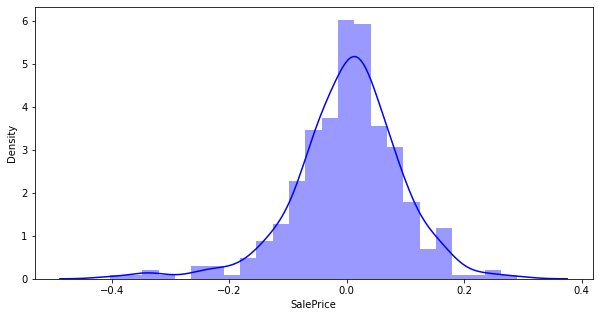

In [99]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals,color="b")
plt.show()

In [100]:
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))


MAE: 0.06689505462266178
MSE: 0.00844898758384414
RMSE: 0.09191837457137794
VarScore: 0.9512161063128024


### Using Ridge and Lasso Regeression

### 1. Ridge Regression 

**Ridge Regression Using Multiple Values of alpha**

In [134]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# list oF alpha values parameters : Ridge regression model

params= {"alpha":[0.001, 1.0, 9.0, 0.01, 0.2, 0.0001, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0,11,12,13,14,15,16,17,18,19,20, 50, 100, 500, 1000]}

ridge_r = Ridge()


# cross validation
ridge_r = GridSearchCV(estimator=ridge_r, 
                       param_grid=params, 
                       cv=5,
                      return_train_score=True,
                      verbose=1,
                      scoring="neg_mean_absolute_error",
                      refit=True)

ridge_r.fit(X,y)

Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 1.0, 9.0, 0.01, 0.2, 0.0001, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11, 12,
                                   13, 14, 15, 16, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [135]:
print(ridge_r.best_params_)
print("-"*20)
print(ridge_r.best_score_)
print("-"*20)
print(ridge_r.best_estimator_)

{'alpha': 10.0}
--------------------
-0.08356492534590382
--------------------
Ridge(alpha=10.0)


In [149]:
##Making predictions for train and test sets: Lasso Regression Model
ridge_test_pred = r2_score(y_test, ridge_r.predict(X_test))
ridge_train_pred = r2_score(y_train, ridge_r.predict(X_train))

In [151]:
##### Accuracy of MOdel

from sklearn.metrics import r2_score 

print("r2_score on Test Data  of Ridge Regression: ", ridge_test_pred)
print("r2_score on Train Data of Ridge Regression: ", ridge_train_pred)

r2_score on Test Data  of Ridge Regression:  0.9351094778159439
r2_score on Train Data of Ridge Regression:  0.9331831033368776


In [152]:
##Display Mean Scores

ridge_cv_results = pd.DataFrame(ridge_r.cv_results_)
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


,param_alpha,mean_train_score,mean_test_score,rank_test_score
23,10.0,-0.069946,-0.083565,1
2,9.0,-0.069704,-0.083570,2
22,9.0,-0.069704,-0.083570,2
13,9.0,-0.069704,-0.083570,2
24,11,-0.070173,-0.083576,5
21,8.0,-0.069444,-0.083594,6
12,8.0,-0.069444,-0.083594,6
25,12,-0.070385,-0.083601,8
26,13,-0.070584,-0.083629,9
20,7.0,-0.069169,-0.083642,10


**For Train**

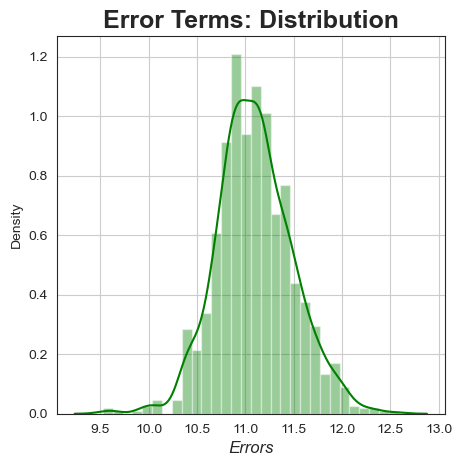

In [174]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res = (y_train - ridge_train_pred)     #residuals
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

**For Test**

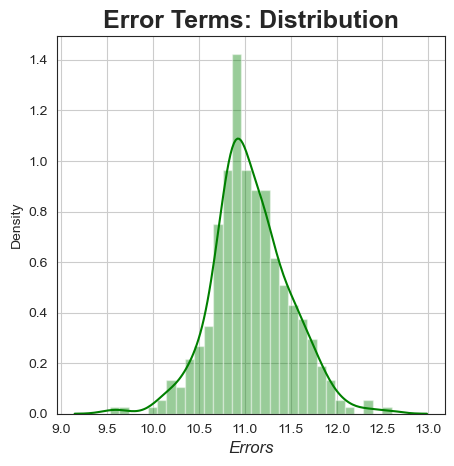

In [178]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res = (y_test - ridge_test_pred)     #residuals
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

**Focusing on smaller alpha value based on above data in Lasso Reg** 

### 2. Lasso Regeression

In [138]:
from sklearn.linear_model import Lasso

# list of alphas 

params_2 = {'alpha': [0.00001, 0.00009, 0.00005, 0.00003, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.005, 0.01, 0.02, 0.05]}


lasso_r = Lasso()
lasso_r = GridSearchCV(estimator=lasso_r,
                       param_grid=params_2,
                       cv=5,
                      return_train_score=True,
                      verbose=1,
                      scoring="neg_mean_absolute_error",
                      refit=True)
lasso_r.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 9e-05, 5e-05, 3e-05, 0.0001, 0.0002,
                                   0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
                                   0.0008, 0.0009, 0.001, 0.005, 0.01, 0.02,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [173]:
print(lasso_r.best_params_)
print("-"*20)
print(lasso_r.best_score_)
print("-"*20)
print(lasso_r.best_estimator_)

{'alpha': 0.0003}
--------------------
-0.08261946217748103
--------------------
Lasso(alpha=0.0003)


In [154]:
##Display Mean Scores

ridge_cv_results = pd.DataFrame(lasso_r.cv_results_)
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


,param_alpha,mean_train_score,mean_test_score,rank_test_score
6,0.0003,-0.070068,-0.082619,1
5,0.0002,-0.068446,-0.082761,2
7,0.0004,-0.071325,-0.082961,3
8,0.0005,-0.072347,-0.083425,4
9,0.0006,-0.073255,-0.083872,5
4,0.0001,-0.066726,-0.084207,6
10,0.0007,-0.074071,-0.084244,7
1,0.00009,-0.066524,-0.084454,8
11,0.0008,-0.074793,-0.084549,9
12,0.0009,-0.075498,-0.084968,10


In [170]:
##Making predictions for train and test sets: Lasso Regression Model
lasso_test_pred = r2_score(y_test, lasso_r.predict(X_test))
lasso_train_pred = r2_score(y_train, lasso_r.predict(X_train))

##### Accuracy of MOdel

from sklearn.metrics import r2_score 

print("r2_score on Test Data  of Lasso Regression: ", lasso_test_pred)
print("r2_score on Train Data of Lasso Regression: ", lasso_train_pred)

r2_score on Test Data  of Lasso Regression:  0.9374130561382444
r2_score on Train Data of Lasso Regression:  0.9319132250482263


**For Train**

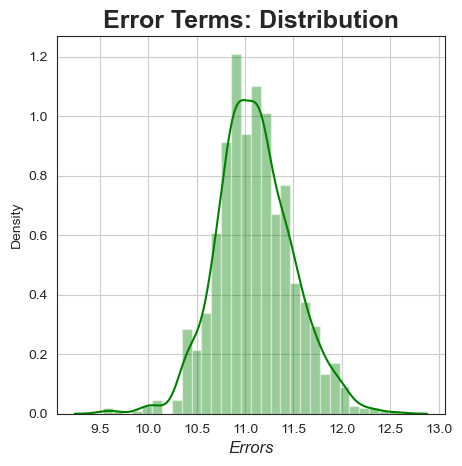

In [180]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res = (y_train - lasso_train_pred)     #residuals
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

**For Test**

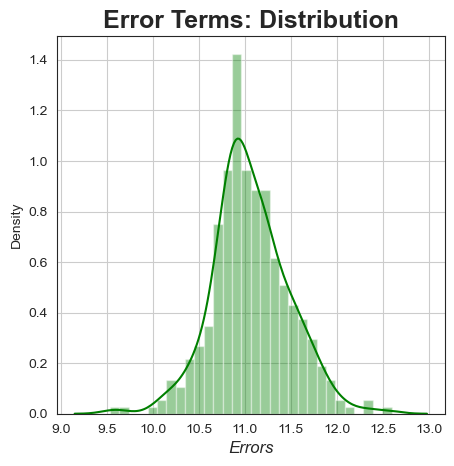

In [181]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res = (y_test - lasso_test_pred)     #residuals
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

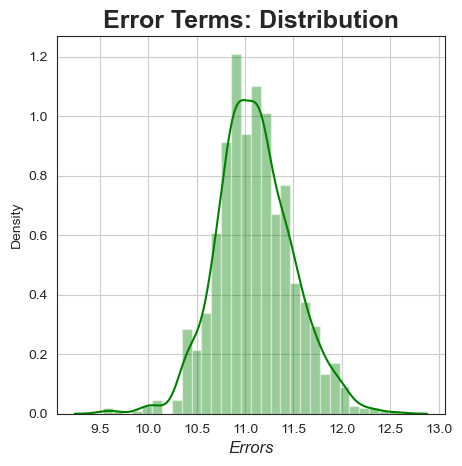

In [182]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res = (y_train - lasso_train_pred)     #residuals
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

`Insight`

- **Ridge Regression Perfom better than Lasso Regression**.

In [189]:
lasso_train_pred

0.9319132250482263

## Conclusion

In [ ]:
Ridge Regression is better than Lasso Regression. It increase the accuracy

###############################################################

## Q / A 

**Question 1**

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

#### Q1 .  Optimal Value of alpha for ridge and lasso regression (importing values already computed)

optimal_alpha_ridge = 10.0        #(Computed Above: For Ridge Regression)
optimal_alpha_lasso = 0.0003    #(Computed Above: For Lasso Regre

#### Q.2 You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

In [ ]:
Optimal Value of Alpha: • •
The computed optimal value of alpha for Ridge Regression (Original Model): 10.0 The computed optimal value of alpha for Lasso Regression (Original Model): 0.0003 

For Ridge Regression Model (Original Model, alpha=10.0): 
r2_score on Test Data  of Ridge Regression:  0.9351094778159439
r2_score on Train Data of Ridge Regression:  0.9331831033368776

For Lasso Regression Model (Original Model: alpha=0.001): 
r2_score on Test Data  of Lasso Regression:  0.9374130561382444
r2_score on Train Data of Lasso Regression:  0.9319132250482263

#### Q.3 After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [195]:
 ['GrLivArea', 'MSZoning_FV', 'MSSubClass_160', 'Exterior1st_BrkComm', 'AgeofProperty']

['GrLivArea',
 'MSZoning_FV',
 'MSSubClass_160',
 'Exterior1st_BrkComm',
 'AgeofProperty']

#### Q.4 How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?